In [ ]:
!pip install modelbit

In [ ]:
import modelbit
mb = modelbit.login()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(housing['target_names'])
print(housing['feature_names'])

['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(housing.data.shape)

(20640, 8)


**Preparing the dataset**

In [ ]:
dataset = pd.DataFrame(housing.data,columns = housing.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dataset['Price'] = housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
#Exploratory data anylytics ~ correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Multicollinearity: AveBedrms is highly correlated with AveRooms (0.847621). This indicates multicollinearity, where both 'AveBedrms' and 'AveRooms' might be capturing similar information about the size of homes. The positive correlation between 'AveRooms' and Price suggests that larger homes (more rooms) are slightly associated with higher prices. However, since 'AveBedrms' is only a component of 'AveRooms', the specific number of bedrooms might not independently drive prices up, leading to the weak negative correlation.

Text(0, 0.5, 'Price')

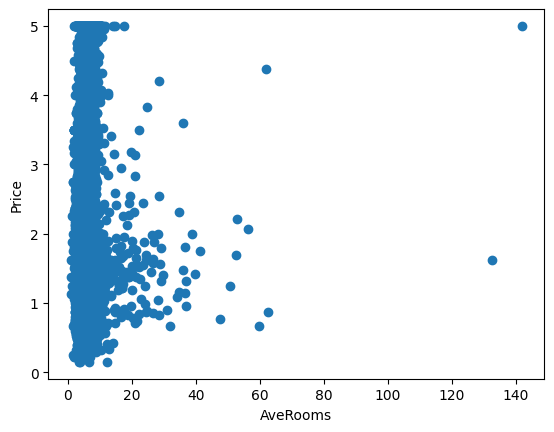

In [ ]:
import seaborn as sns
plt.scatter(dataset['AveRooms'],dataset['Price'])
plt.xlabel('AveRooms')
plt.ylabel('Price')

<Axes: xlabel='AveBedrms', ylabel='Price'>

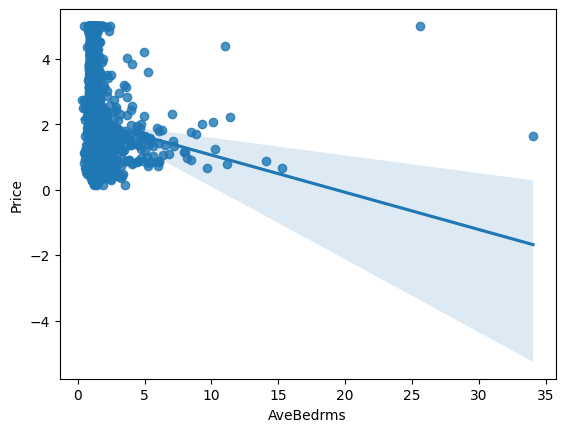

In [ ]:
sns.regplot(x='AveBedrms',y='Price',data=dataset)

In [ ]:
# Independent and dependent feature
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#Spliting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)
model.get_params()

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
2.0719469373788777


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
#Prediction with Test Data
reg_predict=model.predict(x_test)

Text(0, 0.5, 'Predicted Price')

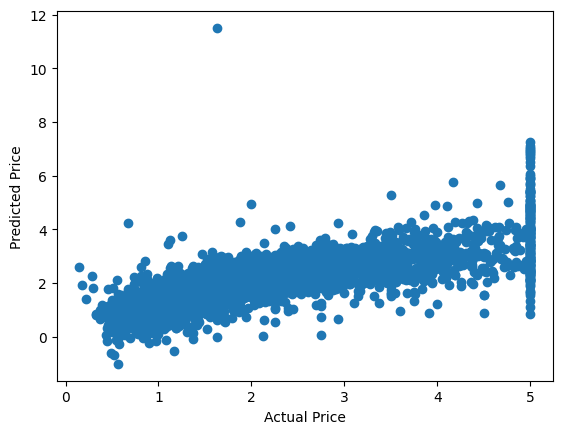

In [ ]:
plt.scatter(y_test,reg_predict)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [ ]:
residuals = y_test - reg_predict
residuals

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: Price, Length: 4128, dtype: float64

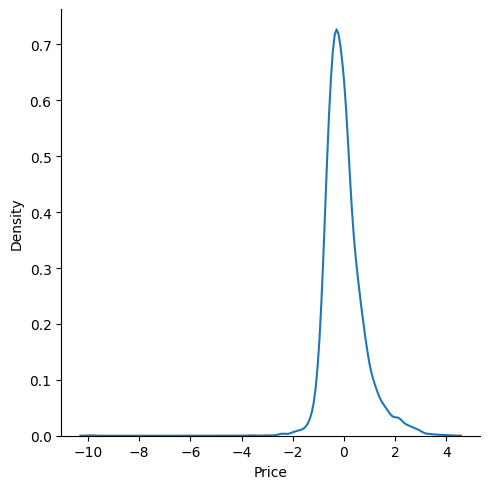

In [ ]:
sns.displot(residuals,kind='kde')

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,reg_predict))
print(np.sqrt(mean_squared_error(y_test,reg_predict)))

0.5558915986952442
0.7455813830127763


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_predict)
adj_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(score)
print(adj_r2)

0.575787706032451
0.574963792861356


**New Data Prediction**

In [ ]:
housing.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [ ]:
scaler.transform(housing.data[0].reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33397811,  0.98330419,  0.64880421, -0.1682248 , -0.97135592,
        -0.04676   ,  1.04692041, -1.32016306]])

In [ ]:
model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.15194269])

**Picking the model file for deployment**

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('regmodel.pkl','wb'))

In [ ]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [ ]:
pickled_model.predict(scaler.transform(housing.data[0].reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.15194269])

In [ ]:
import pickle


def predict_median_house_value(MedInc: float, HouseAge: float, AveRooms: float, AveBedrms: float, Population: float, AveOccup: float, Latitude: float, Longitude: float) -> float:
    """
    Predict the median house value using a pre-trained machine learning model.

    Args:
        MedInc (float): Median income in block group.
        HouseAge (float): Median house age in block group.
        AveRooms (float): Average number of rooms per household.
        AveBedrms (float): Average number of bedrooms per household.
        Population (float): Block group population.
        AveOccup (float): Average number of household members.
        Latitude (float): Block group latitude.
        Longitude (float): Block group longitude.

    Returns:
        float: Predicted median house value in hundreds of thousands of dollars.
    """
    data = pd.DataFrame([[MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]],
                        columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])
    data_scaled = scaler.transform(data)
    return pickled_model.predict(data_scaled)[0]


In [ ]:
MedInc = 8.3252
HouseAge = 41.0
AveRooms = 6.984127
AveBedrms = 1.023810
Population = 322.0
AveOccup = 2.555556
Latitude = 37.88
Longitude = -122.23

# Predict
predicted_value = predict_median_house_value(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude)
print(f'Predicted Median House Value: {predicted_value}')

Predicted Median House Value: 4.1519430551543515


In [ ]:
mb.deploy(predict_median_house_value)

Uploading 'scaler': 100%|██████████| 672/672 [00:00<00:00, 2.77kB/s]
